In [1]:
%load_ext autoreload
%autoreload 2

import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord

from EXPANSE import ResolvedGalaxy
from EXPANSE.utils import FieldInfo, PhotometryBandInfo

%matplotlib inline

### ID 2540 in JOF catalog.


In [2]:
from batch_fitsmap import main

field_info = main("JOF", "v11", ["ACS_WFC", "NIRCam"], 'austind', return_info=True, overwrite=True)

Processing JOF with version v11 and instruments ['ACS_WFC', 'NIRCam']
Auto detected weight path /raid/scratch/data/hst/JOF/ACS_WFC/mosaic_1084_wispnathan/30mas/ACS_WFC_F435W_JOF_wht.fits for band F435W.
Auto detected error path /raid/scratch/data/hst/JOF/ACS_WFC/mosaic_1084_wispnathan/30mas/rms_err/F435W_rms_err.fits for band F435W.
Auto detected segmentation path /raid/scratch/work/austind/GALFIND_WORK/SExtractor/ACS_WFC/v11/JOF/MAP_RMS/segmentation/JOF_F435W_F435W_sel_cat_v11_seg.fits for band F435W.
Auto detected PSF path /nvme/scratch/work/tharvey/PSFs/JOF/F435W_psf.fits for band F435W.
Auto detected PSF kernel path /nvme/scratch/work/tharvey/PSFs/kernels/JOF/F435W_kernel.fits for band F435W.
Auto detected image path /raid/scratch/data/hst/JOF/ACS_WFC/mosaic_1084_wispnathan/30mas/ACS_WFC_F435W_JOF_drz.fits for band F435W.
Auto detected zero point 25.68 with keyword ZEROPNT for band F435W.
Auto detected unit ELECTRONS/S with keyword BUNIT for band F435W.
Both zero point and unit fou

In [3]:
print(field_info)

Field Info for Survey: JOF
Detection Band: F277W+F356W+F444W

Band    Instrument  Pixel Scale   ZP/Unit  PSF Matched  PSF Type    Err  Wht  Seg  PSF  PSF Kernel  Auto Phot  Aper Phot  
--------------------------------------------------------------------------------------------------------------------------
F435W   auto        0.030 arcsec  25.68    No           star_stack  Yes  Yes  Yes  Yes  Yes         No         No         
F606W   auto        0.030 arcsec  26.51    No           star_stack  Yes  Yes  Yes  Yes  Yes         No         No         
F775W   auto        0.030 arcsec  25.69    No           star_stack  Yes  Yes  Yes  Yes  Yes         No         No         
F814W   auto        0.030 arcsec  25.94    No           star_stack  Yes  Yes  Yes  Yes  Yes         No         No         
F850LP  auto        0.030 arcsec  24.87    No           star_stack  Yes  Yes  Yes  Yes  Yes         No         No         
F090W   auto        0.030 arcsec  28.087   No           star_stack  Yes  Yes 

In [4]:
galaxy_id = '10250' #'2540'
survey = 'JOF'
cutout_size = 250 # pixels
#position = SkyCoord(53.04430488141871*u.deg, -27.895251706823906*u.deg, frame='icrs')
redshift = 0.37#1.02
position = SkyCoord(53.02883128090617*u.deg, -27.88038155824919*u.deg, frame='icrs')
galaxy = ResolvedGalaxy.init_from_basics(galaxy_id = galaxy_id,
                                        field_info = field_info,
                                        survey = survey,
                                        cutout_size=cutout_size,
                                        sky_coord=position,
                                        redshift=redshift,
                                        overwrite=True)

galaxy = ResolvedGalaxy.init_from_h5(f"{survey}_{galaxy_id}.h5")

KeyboardInterrupt: 

In [ ]:
galaxy

Resolved Galaxy 2540 from JOF survey
SkyCoord: <SkyCoord (ICRS): (ra, dec) in deg
    (53.04430488, -27.89525171)>
Bands: ['F435W', 'F606W', 'F775W', 'F814W', 'F850LP', 'F090W', 'F115W', 'F150W', 'F162M', 'F182M', 'F200W', 'F210M', 'F250M', 'F277W', 'F300M', 'F335M', 'F356W', 'F410M', 'F444W']
Cutout size: 250
Aperture photometry: {}

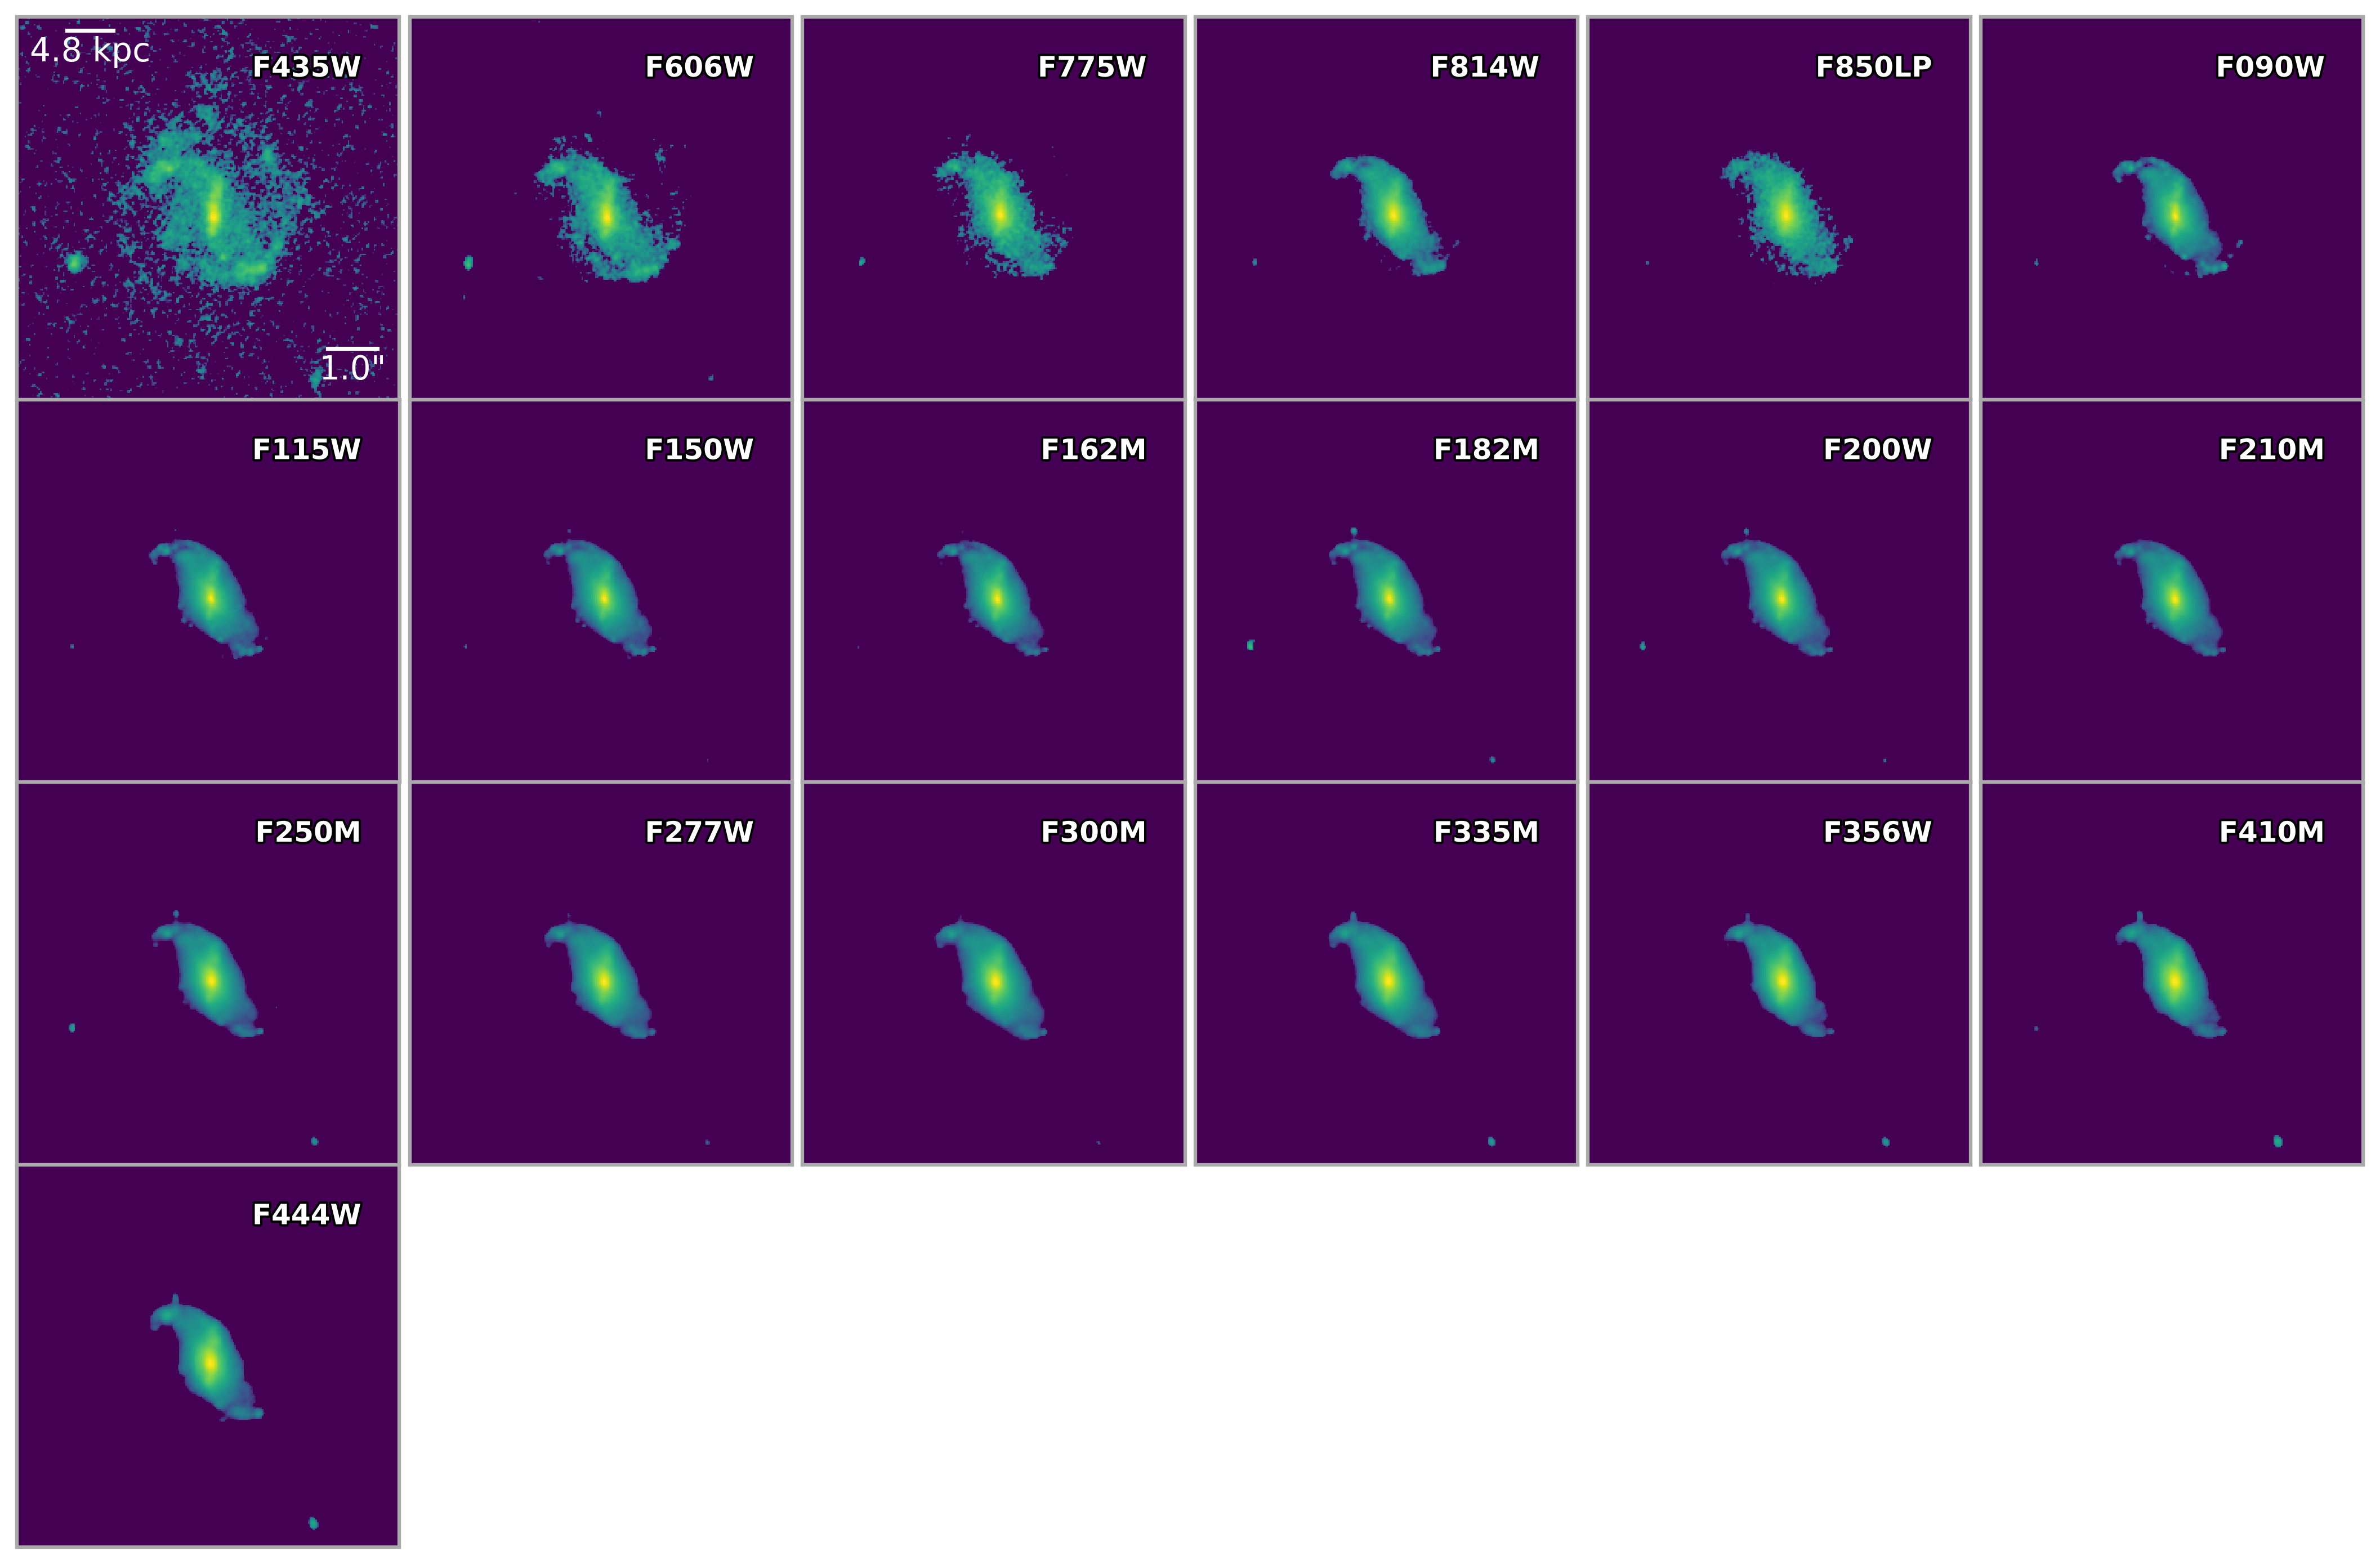

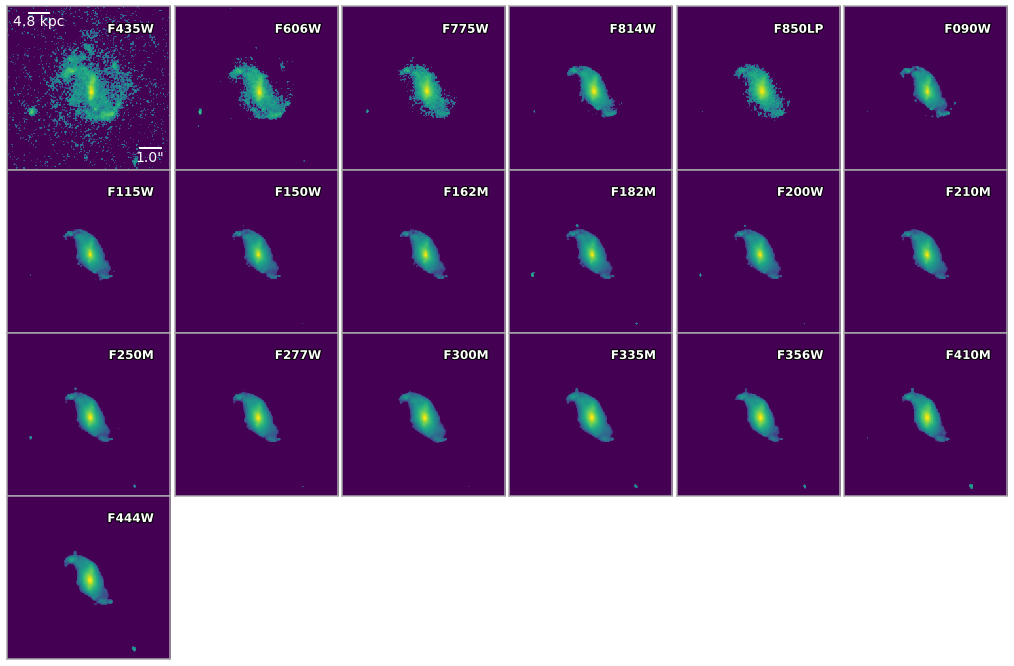

In [ ]:
%matplotlib inline
galaxy.plot_cutouts()

plt.show()

In [ ]:
galaxy.pixel_by_pixel_galaxy_region(mask='seg_det', smooth=True, overwrite=True)

In [ ]:
galaxy.pixel_by_pixel_binmap(overwrite=True)

In [ ]:
galaxy.measure_flux_in_bins(overwrite=True)

False
  ID  type ...         F444W                F444W_err       
           ...          uJy                    uJy          
----- ---- ... ---------------------- ----------------------
    1  bin ...  0.0001703102824000735 2.3165477614384145e-05
    2  bin ... 0.00017876232511335449 2.3091037292033434e-05
    3  bin ... 0.00019053665531505707 2.3266793505172245e-05
    4  bin ... 0.00021924758713654644  2.333865086256992e-05
    5  bin ... 0.00020728937118414116 2.3348162358161062e-05
    6  bin ... 0.00016398625041022242  2.325018613191787e-05
    7  bin ... 0.00010594124906270158 2.3249009245773777e-05
    8  bin ...   7.57689924027058e-05 2.3116195734473877e-05
    9  bin ...  9.169815211600835e-05 2.3153514121077023e-05
  ...  ... ...                    ...                    ...
24867  bin ... 0.00014794018338568066 2.2952566723688506e-05
24868  bin ...  0.0001351234401300076 2.3072825570125133e-05
24869  bin ...  0.0001267781145608181 2.3019301806925796e-05
24870  bin ... 0.0

ID,type,F435W,F435W_err,F606W,F606W_err,F775W,F775W_err,F814W,F814W_err,F850LP,F850LP_err,F090W,F090W_err,F115W,F115W_err,F150W,F150W_err,F162M,F162M_err,F182M,F182M_err,F200W,F200W_err,F210M,F210M_err,F250M,F250M_err,F277W,F277W_err,F300M,F300M_err,F335M,F335M_err,F356W,F356W_err,F410M,F410M_err,F444W,F444W_err
,,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy
str9,str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,bin,-2.6207082620916173e-05,0.00017026016103593354,2.2090713529417046e-05,0.0032480723883723675,0.00017797422944688742,0.005603779981730073,7.09397911135497e-05,0.0017823440541538359,3.60872946698726e-05,0.006265426641696261,6.570067618835139e-05,6.376176831690598e-05,0.00010756277558047049,5.423018807438335e-05,0.00011769757176076286,5.244880992413373e-05,0.00013190582739916785,6.264644625619275e-05,0.0001636853206620814,3.486600489682599e-05,0.00018037712663103732,5.3140269291250536e-05,0.00017510042610905928,4.470841473662584e-05,0.00014691743150505176,1.7994334906842294e-05,0.00019184525760789547,1.698281775218195e-05,0.00023231626787788322,1.4182160544023863e-05,0.0001894837718329874,1.4556522623196534e-05,0.00016805201969567808,1.7920814422964003e-05,0.0001964590736947674,2.6820748256470562e-05,0.0001703102824000735,2.3165477614384145e-05
2,bin,-2.534938854088873e-06,0.00016997211658289298,-2.585567195196742e-06,0.0032475371876394183,0.00019685685236757903,0.005587549097404158,4.624485697485635e-05,0.001769542263656376,6.998706616216481e-05,0.006213746331892112,7.39571720877975e-05,6.404629536552905e-05,0.00012831458159468417,5.44062551154463e-05,0.0001388937083073502,5.243162598292777e-05,0.0001674998004357536,6.307743961810972e-05,0.000194640934108614,3.5076630931650344e-05,0.0002223956703110297,5.351260022025436e-05,0.00021827270725431323,4.5008655278120366e-05,0.00018109890646591322,1.8067362164040993e-05,0.0002438538611363444,1.714948755897649e-05,0.0002870908453891086,1.4416264609721533e-05,0.00022655950027867036,1.4636755589743337e-05,0.00021218282497014802,1.819575820068866e-05,0.00023300616665423643,2.6852362472072966e-05,0.00017876232511335449,2.3091037292033434e-05
3,bin,2.0375081185739257e-05,0.000169188760091656,4.2476876858031695e-06,0.0032466914995492387,0.00018192622573899903,0.005550829854622692,5.805946261368397e-05,0.0017633262684679702,5.501152644868274e-05,0.006149668598878541,9.014748973790031e-05,6.426565618110124e-05,0.0001481101029886852,5.455448247517785e-05,0.00016213150080392064,5.2410428459862995e-05,0.00020635294540571775,6.34571919865327e-05,0.00022447755467429803,3.52683195412986e-05,0.00025715693269966113,5.3862512456297056e-05,0.0002653628099312695,4.5328494846074826e-05,0.0002184414571158247,1.8135660054747148e-05,0.00030069118611789617,1.735227907396869e-05,0.0003347207034143476,1.4561916080886595e-05,0.0002537672163296847,1.4693568557446884e-05,0.0002600160997619042,1.8540899903699964e-05,0.00025686289373263164,2.6850098546796244e-05,0.00019053665531505707,2.3266793505172245e-05
4,bin,3.847313412304924e-05,0.00016818194556671016,1.0575128232044421e-05,0.0032436937134199166,0.00016198747669156238,0.005520129037904176,9.486747972358586e-05,0.001766957709034083,1.2280263781026753e-05,0.006096612634431772,9.986303881595372e-05,6.428062789694815e-05,0.00015829929222022288,5.456701003008792e-05,0.00017829799824804535,5.238754115519402e-05,0.0002406852498145721,6.366268712732853e-05,0.00024143517110990665,3.535259569716785e-05,0.00027676329968021973,5.409956067198014e-05,0.0002986636205420566,4.550194182932974e-05,0.0002454306655157908,1.816490364194807e-05,0.0003397700650184032,1.7516176216111262e-05,0.0003569064452012851